In [88]:
# %pip install ggplot

In [89]:
# %pip install sklearn

In [90]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC Curve

#### Generate and format the given test data

In [91]:
def generate_test_dataframe():
  prob = [0.95, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,
          0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1]
  true_class = ['P', 'P', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'N',
                'P', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'N']
  data = [true_class, prob]
  df = pd.DataFrame(data=data)
  tdf = df.transpose()    
  tdf.columns = ['Class', 'Score']
  
  return tdf

In [92]:
test_df = generate_test_dataframe()

In [101]:
test_df

,Class,Score
0,P,0.95
1,P,0.8
2,N,0.7
3,P,0.6
4,P,0.55
5,P,0.54
6,N,0.53
7,N,0.52
8,P,0.51
9,N,0.505


In [94]:
X = test_df['Score']
y = test_df['Class']

In [96]:
fpr, tpr, threshholds = roc_curve(y_true=y, y_score=X, pos_label='P', drop_intermediate=False)

In [97]:
roc_df = pd.DataFrame({'True Positive Rate': tpr, 'False Positive Rate': fpr})
roc_df.shape

(21, 2)

Text(0.5, 0, 'False Positive Rate')

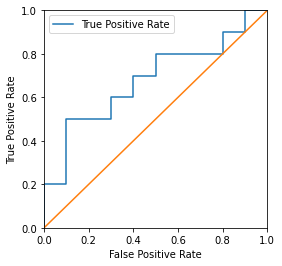

In [98]:
ax = roc_df.plot(x='False Positive Rate', y='True Positive Rate', figsize=(4, 4))
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.plot((0, 1), (0, 1))
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')

In [99]:
roc_df

,True Positive Rate,False Positive Rate
0,0.0,0.0
1,0.1,0.0
2,0.2,0.0
3,0.2,0.1
4,0.3,0.1
5,0.4,0.1
6,0.5,0.1
7,0.5,0.2
8,0.5,0.3
9,0.6,0.3
